- Grab new songs for genre from spotify -> feasible?
- Run popularity prediction
- Return sample

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv('SpotifyFeatures.csv')
print(df.columns)
df.describe()

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [3]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [4]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
df["key_num"] = df["key"].astype('category').cat.codes
df["mode_num"] = df["mode"].astype('category').cat.codes
df["time_signature_num"] = df["time_signature"].astype('category').cat.codes

In [6]:
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,key_num,mode_num,time_signature_num
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,...,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,4,0,3
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,...,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,9,1,3
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,...,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,3,1,4
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,...,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,4,0,3
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,...,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,8,0,3


In [7]:
df = df.dropna()

df = df.sort_values(by="popularity", ascending=False).drop_duplicates('track_id', keep='first')

In [8]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "key_num", "mode_num", "time_signature_num"]
# features = ["liveness", "loudness", "speechiness", "tempo", "valence", "key_num", "mode_num", "time_signature_num"]

In [9]:
x = df[features]
y = df["popularity"]

x_mean = x.mean()
x_std = x.std()
y_mean = y.mean()
y_std = y.std()

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
len(x_train), len(x_test)

(141418, 35355)

In [66]:
x_train = x_train[:100]
y_train = y_train[:100]

x_test = x_test[:100]
y_test = y_test[:100]

In [67]:
# do a linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(mean_squared_error(y_test, y_pred))

# do a random forest

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(mean_squared_error(y_test, y_pred))

0.8728385640106643
0.7778964441926749


In [68]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=[len(features)]),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(32),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(16),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(1e-3)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

y_pred = model.predict(x_test)
model.save('spotify_model_1.h5')

mean_squared_error(y_test, y_pred)

Epoch 1/50


c:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 1.4082 - val_loss: 0.8306
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9449 - val_loss: 0.8325
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7028 - val_loss: 0.8339
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4952 - val_loss: 0.8318
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4872 - val_loss: 0.8323
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5851 - val_loss: 0.8338
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4914 - val_loss: 0.8339
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3720 - val_loss: 0.8339
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3626 - val_loss: 0.8337
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3868 - val_loss: 0.8338
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4034 - val_loss: 0.8359
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3576 - val_loss: 0.8390
Epoch 13/50


0.938021042988118

In [74]:
x_std

acousticness               0.366302
danceability               0.190386
duration_ms           130513.315440
energy                     0.275840
instrumentalness           0.322936
liveness                   0.211027
loudness                   6.395573
speechiness                0.204345
tempo                     31.325139
valence                    0.267819
key_num                    3.462650
mode_num                   0.473810
time_signature_num         0.426500
dtype: float64

In [69]:
save = False
if save: model.save('model.keras')

In [80]:
# read the model
model = keras.models.load_model('model.keras')

# do a prediction
x = df[features]
y = df["popularity"]

model.predict(x_train[:10]) * y_std + y_mean

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


c:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


array([[52.13308 ],
       [35.538025],
       [45.929184],
       [34.245   ],
       [50.768353],
       [40.32439 ],
       [42.38825 ],
       [23.303608],
       [31.661095],
       [39.712627]], dtype=float32)

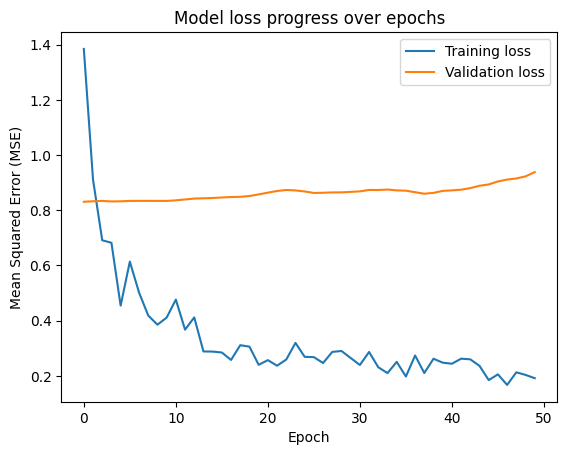

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss progress over epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [ ]:
raise

In [74]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# client_id = ''
# client_secret = ''

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, client_secret))

# Get a list of new releases
new_releases = spotify.new_releases('US', limit=50)
albums = new_releases['albums']['items']

for album in albums:
   # Get the artists on the album
   artists = album['artists']
   for artist in artists:
      # Get the genres for the artist
      artist_info = spotify.artist(artist['id'])
      genres = artist_info['genres']

      # If the desired genre is in the artist's genres, print their name
      if 'pop' in genres:
         print(artist['name'])

Kygo
Kehlani
Normani
Charli xcx
Meghan Trainor
Twenty One Pilots
Billie Eilish
ZAYN
Galantis


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = 'your client id'
client_secret = 'your client secret'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, client_secret))

# specify the preferred genre
preferred_genre = 'pop'

# Get a list of new releases
new_releases = spotify.new_releases('US', limit=50)
albums = new_releases['albums']['items']
track_list = []

# Go through each album
for album in albums:
    album_id = album['id']
    tracks = spotify.album_tracks(album_id)
    for track in tracks['items']:
        artists = track['artists']
        for artist in artists:
            artist_info = spotify.artist(artist['id'])
            genres = artist_info['genres']

            # If the preferred genre is in the artist genres, get the features of the song
            if preferred_genre in genres:
                features = spotify.audio_features([track['id']])
                track_list.append({'name': track['name'], 'features': features})

            # If the track list is more than 10, return it
            if len(track_list) > 10:
                break
        if len(track) > 10:
            break
    if len(track_list) > 10:
            break

for track in track_list:
     print(track)